## Synthoseis Quick Start Notebook

Synthoseis is an open source, Python-based tool used for generating pseudo-random seismic data. The goal of Synthoseis is to generate realistic seismic data for deep learning training. This notebook will serve as a guide to getting your first Synthoseis model up and running. Future notebooks will discuss seismic outputs, visualizations, and building a custom rock properties model.

### Environment Build

To install the necessary packages, use the `environment.yml` file to create a virtual or conda environment. Please note that the most recent version of Synthoseis has been refactored to work with Python 3.10.

### Imports

Within the main directory of the repo is a script called `main.py`. This is the primary script to run the program. Import `main.py`, along with visualization tools to view the results.

In [1]:
import main as mn 
import numpy as np
import json
import pprint as pp
import matplotlib.pyplot as plt

/raid/ridhwan/.venv/lib/python3.10/site-packages/bruges/__init__.py:20: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


### Building your first model

The config json file is the method for defining some of the key aspects of your seismic survey including survey size, seismic bandwith, column height range, number of faults, sand thickness ranges, and the presence of geobodies like salt and channels. Please note that setting `include_channels: True` will signifcantly increase compute time and memory consumption. Below is an example config file that can be found in `./config/example.json`.

In [2]:
rock_model = json.load(open('./config/example.json', 'r'))
pp.pprint(rock_model)

{'bandwidth_high': [60.0, 65.0],
 'bandwidth_low': [10.0, 15.0],
 'bandwidth_ord': 4,
 'basin_floor_fans': False,
 'broadband_qc_volume': False,
 'closure_types': ['simple', 'faulted'],
 'cube_shape': [300, 300, 1250],
 'digi': 4,
 'dip_factor_max': 1,
 'extra_qc_plots': True,
 'incident_angles': [0],
 'include_channels': False,
 'include_salt': True,
 'infill_factor': 10,
 'initial_layer_stdev': [5.0, 10.0],
 'max_column_height': [150.0, 150.0],
 'max_number_faults': 6,
 'min_closure_voxels_faulted': 2500,
 'min_closure_voxels_onlap': 500,
 'min_closure_voxels_simple': 500,
 'min_number_faults': 1,
 'model_qc_volumes': False,
 'multiprocess_bp': True,
 'pad_samples': 10,
 'partial_voxels': True,
 'project': 'example',
 'project_folder': '/raid/ridhwan/synthoseis/synthoseis_example',
 'sand_layer_fraction': {'max': 0.25, 'min': 0.05},
 'sand_layer_thickness': 2,
 'seabed_min_depth': [20, 50],
 'signal_to_noise_ratio_db': [20.5, 30.5, 35.5],
 'thickness_max': 25,
 'thickness_min': 8,
 '

### Running the model

Once you've defined the parameters of your seismic data, call the `build_model()` function in `main.py`. This will take the config `.json` file as an input, as well as a `run_id` defined by the user. Users also have the option to use `test_mode`. Test mode can take an integer as an input and returns a smaller seismic volume than defined in the config file. This is great for testing prior to running the full size model.

In [3]:
mn.build_model(user_json='./config/example.json', run_id=20)

Coherent smiles will be inserted
Salt will be inserted. noise_stretch_factor = 1.26

Model folder: /raid/ridhwan/synthoseis/synthoseis_example/seismic__2025.59608329_20
Creating directory: /raid/ridhwan/synthoseis/synthoseis_example/seismic__2025.59608329_20
Creating directory: /raid/ridhwan/synthoseis/temp_folder__2025.59608329_20

Keyfile created at /raid/ridhwan/synthoseis/synthoseis_example/seismic__2025.59608329_20/seismicCube_2025.59608329.key
self.cfg.num_lyr_lut =  25000
onlap_layer_list =  [ 31  64  83 167]
Number of onlapping flags: 4
 ... horizon number for first onlap episode = 31
 ... number of channelFlags: 0
 ... horizon number for first channel episode: 0
	Indices for shallowest point in cube: 299, 0
Building random depth map at base of model
azi, dip, dipping_plane min/mean/max = 36.85434390345399, 0.0017084456741923715, 0.00, 0.01, 0.02
current_depth_map min/mean/max = 12463.58, 12850.11, 13239.32
thickness_map min/mean/max = 2.12, 34.56, 69.96
Layer 0, depth_maps.sha

  0%|          | 0/4 [00:00<?, ?it/s]



 ... inserting fault 0 with throw 6.12
   ... fault ellipsoid semi-axes (a, b, c): 197.04, 508.15, 5652.75
   ... fault ellipsoid origin (x, y, z): 230.62, 108.00, -430.21
   ... tilt_pct: 62.88
   ...z for bottom of ellipsoid at depth (samples) = -2431863.0
   ...shape of output_cube = (300, 300, 1260)
   ...infill_factor, pad_samples = 10, 10
   ...shear_zone_width (samples) = 1.5
   ...gouge_pctile (percent*100) = 66.19147194517308
   .... output_cube.shape = (300, 300, 1260)
   .... (np.arange(output_cube.shape[2])*infill_factor).shape = (1260,)


  0%|          | 0/4 [00:11<?, ?it/s]


ValueError: a must be greater than 0 unless no samples are taken

Let's check to see if the test mode seismic data successfully wrote to a temp location. If the data looks correct, turn off test mode and run the full model. A full model of size `(300,300,1250)` will take 30-60 minutes to complete.

In [ ]:
%ls /raid/ridhwan/synthoseis/synthoseis_example_test_mode_/seismic__2025.59576289_1/seismicCubes_RFC_fullstack*

/raid/ridhwan/synthoseis/synthoseis_example_test_mode_/seismic__2025.59576289_1/seismicCubes_RFC_fullstack_2025.59576289.npy*


In [ ]:
seismic = np.load('/raid/ridhwan/synthoseis/synthoseis_example_test_mode_/seismic__2025.59576289_1/seismicCubes_RFC_fullstack_2025.59576289.npy')
print(seismic.shape)

(50, 50, 1259)


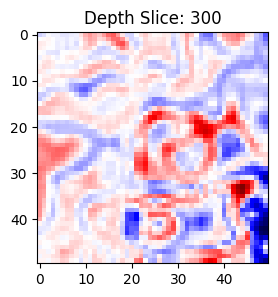

In [ ]:
plt.figure(figsize=(3,3))
plt.title('Depth Slice: 300')
plt.imshow(seismic[...,300], cmap=plt.cm.seismic)
plt.show()

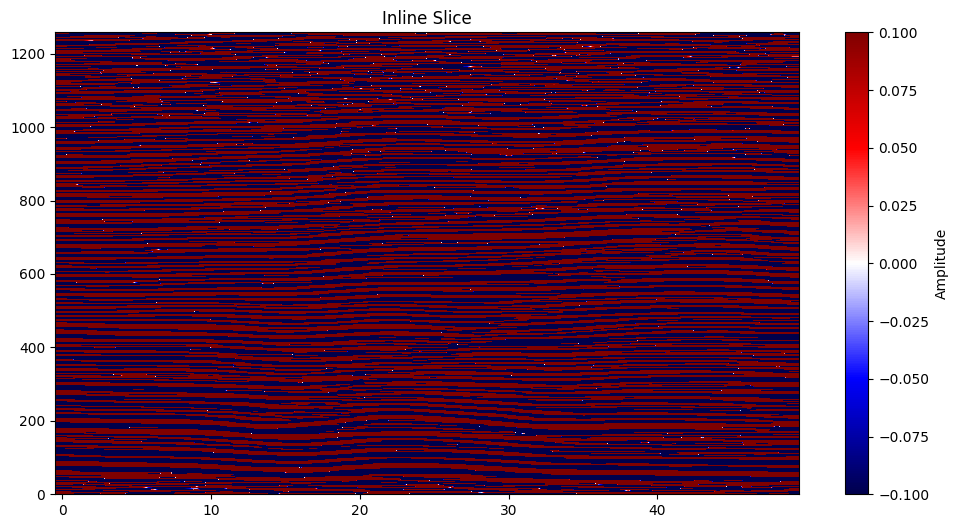

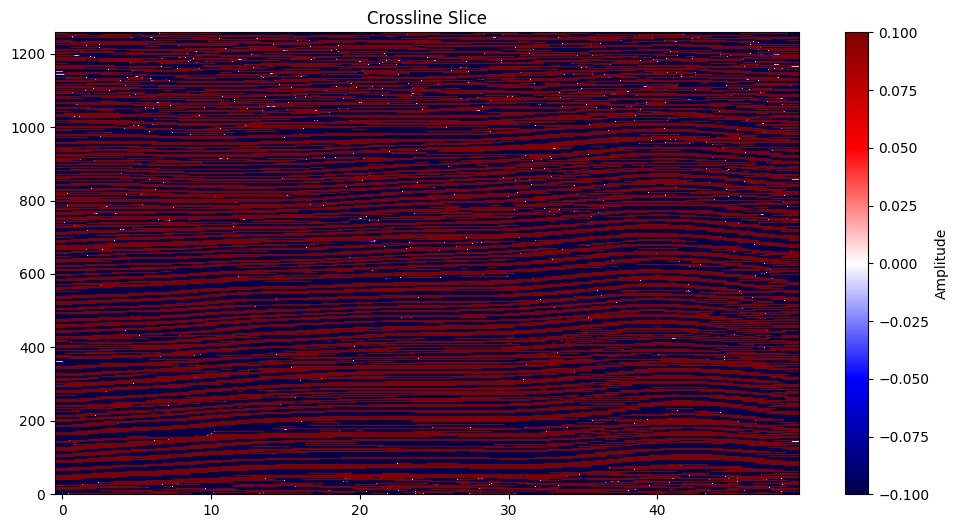

In [ ]:
import matplotlib.pyplot as plt
inline_index = seismic.shape[0] // 2      # middle inline
crossline_index = seismic.shape[1] // 2   # middle crossline

inline = seismic[inline_index, :, :]      # shape [crossline, depth]
crossline = seismic[:, crossline_index, :] # shape [inline, depth]

# Plot inline
plt.figure(figsize=(12, 6))
plt.imshow(
    inline.T,         # transpose so depth is vertical
    cmap="seismic",   # blue-white-red style
    aspect="auto",    # stretch to fill
    vmin=-0.1, vmax=0.1  # adjust to your amplitude range
)
plt.colorbar(label="Amplitude")
plt.title("Inline Slice")
plt.gca().invert_yaxis()  # depth/time goes down
plt.show()

# Plot crossline
plt.figure(figsize=(12, 6))
plt.imshow(
    crossline.T,
    cmap="seismic",
    aspect="auto",
    vmin=-0.1, vmax=0.1
)
plt.colorbar(label="Amplitude")
plt.title("Crossline Slice")
plt.gca().invert_yaxis()
plt.show()
